
<br>
This file is for binary classification using TensorFlow<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from util import get_vehicle_data
from logistic_np import *

In [2]:
tf.compat.v1.disable_eager_execution() # for some reason, this line of code is required, need further investigation

In [3]:
if __name__ == "__main__":
    np.random.seed(2018)
    tf.compat.v1.set_random_seed(2018)

    # Load data from file
    # Make sure that vehicles.dat is in data/
    train_x, train_y, test_x, test_y = get_vehicle_data()
    num_train = train_x.shape[0]
    num_test = test_x.shape[0]

    #generate_unit_testcase(train_x.copy(), train_y.copy())
    # logistic_unit_test()

    # Normalize our data: choose one of the two methods before training
    #train_x, test_x = normalize_all_pixel(train_x, test_x)
    train_x, test_x = normalize_per_pixel(train_x, test_x)

    # Reshape our data
    # train_x: shape=(2400, 64, 64) -> shape=(2400, 64*64)
    # test_x: shape=(600, 64, 64) -> shape=(600, 64*64)
    train_x = reshape2D(train_x)
    test_x = reshape2D(test_x)

    # Pad 1 as the last feature of train_x and test_x
    train_x = add_one(train_x)
    test_x = add_one(test_x)

    # [TODO 1.11] Create TF placeholders to feed train_x and train_y when training
    x = tf.compat.v1.placeholder(tf.float32, shape = [None,train_x.shape[1]], name = 'input')
    y = tf.compat.v1.placeholder(tf.float32, shape = [None,train_y.shape[1]], name ='output')
    # print(x.shape, '\n', y.shape)
    # [TODO 1.12] Create weights (W) using TF variables
    w =  tf.Variable(tf.zeros([train_x.shape[1],train_y.shape[1]]))
    # print(w.shape)
    # [TODO 1.13] Create a feed-forward operator
    z = tf.matmul(x,w)
    pred = 1/(1+tf.exp(-z))
    
    # [TODO 1.14] Write the cost function
    cost = -tf.reduce_sum(y*tf.math.log(pred)+(1-y)*tf.math.log(1-pred))/num_train
    # print(tf.math.log(pred).shape)
    print(type(cost))

    # Define hyper-parameters and train-related parameters
    num_epoch = 1000
    learning_rate = 0.01
    momentum_rate = 0.9

    # [TODO 1.15] Create an SGD optimizer
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

Reading vehicle data...
EOF Reached
[[124.12152778 123.65819444 123.39638889 ... 124.71611111 124.26833333
  124.54      ]
 [124.29138889 124.56708333 123.61125    ... 124.40027778 124.04361111
  123.92263889]
 [124.86638889 124.62680556 123.62111111 ... 124.51527778 124.24791667
  123.63263889]
 ...
 [124.05208333 123.66388889 123.09986111 ... 121.32777778 122.25666667
  122.21375   ]
 [124.09611111 124.29972222 124.10458333 ... 121.70166667 122.48986111
  123.07805556]
 [124.78361111 124.31458333 124.46361111 ... 122.54666667 123.13694444
  123.51569444]]
[[49.86093252 50.10132208 50.38800844 ... 53.71453748 53.63705564
  53.69699085]
 [50.26221337 49.99852627 50.55848679 ... 53.20277562 53.13179495
  53.0612791 ]
 [52.01168334 51.31539761 51.26715033 ... 52.64057413 52.80362616
  52.34046395]
 ...
 [53.85923027 53.68835648 54.15068551 ... 54.17407186 53.8078212
  53.00791176]
 [53.72671351 53.95707038 54.28046198 ... 54.35889291 54.01682085
  52.98950997]
 [54.26203425 53.81704148 5

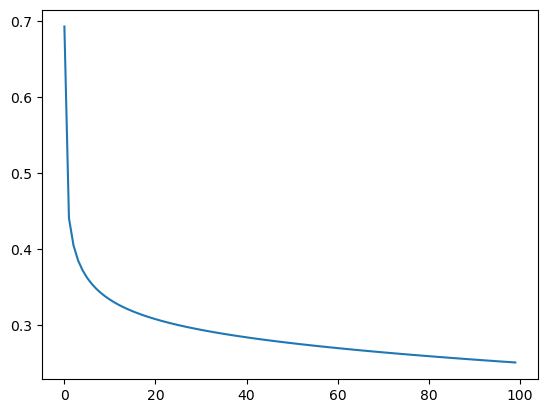

Epoch 100: loss is 0.25087


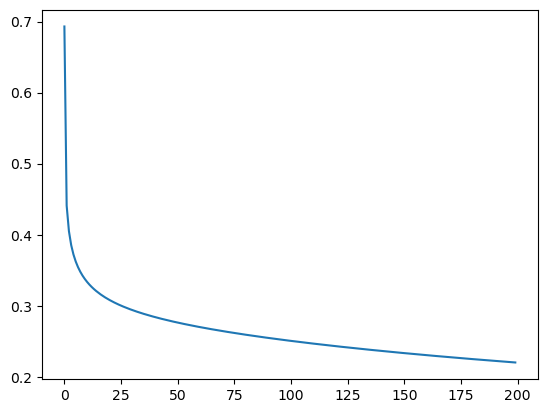

Epoch 200: loss is 0.22008


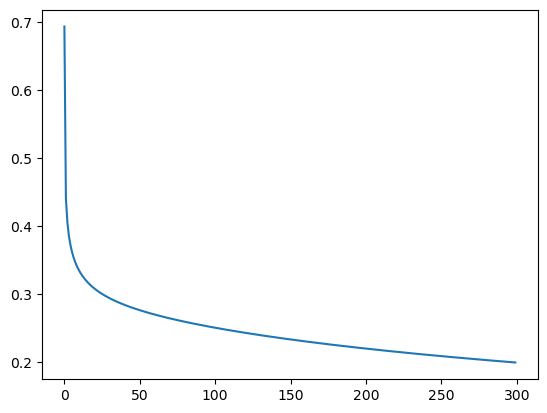

Epoch 300: loss is 0.19944


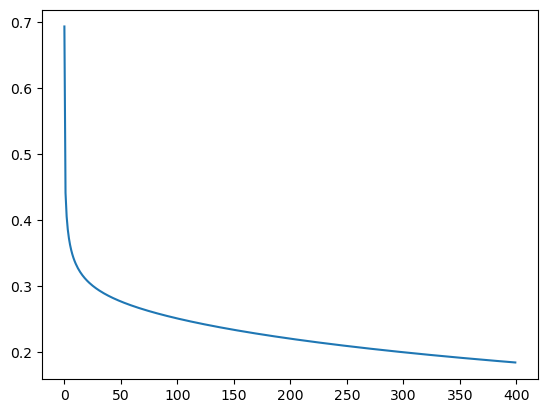

Epoch 400: loss is 0.18376


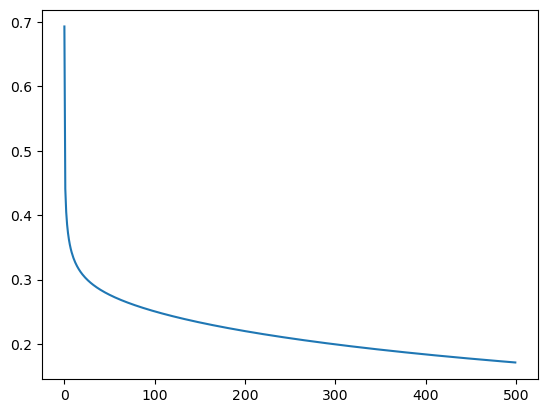

Epoch 500: loss is 0.17114


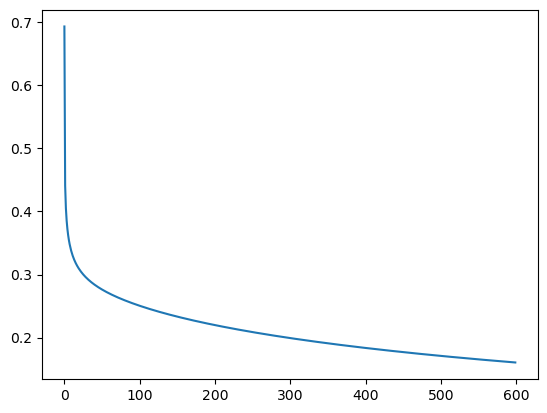

Epoch 600: loss is 0.16059


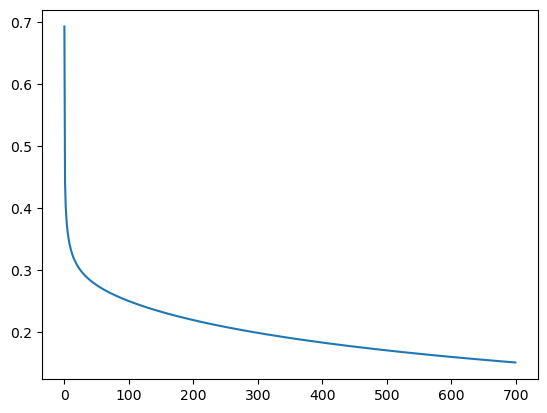

Epoch 700: loss is 0.15157


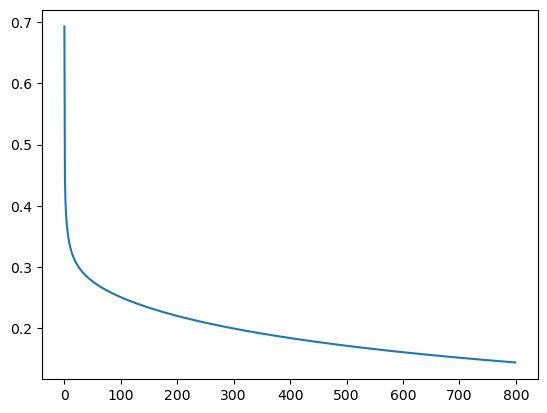

Epoch 800: loss is 0.14372


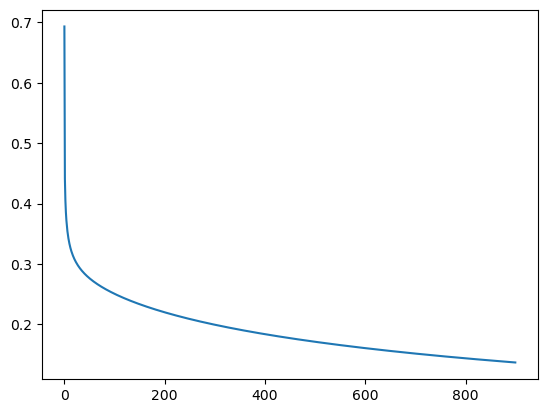

Epoch 900: loss is 0.13678


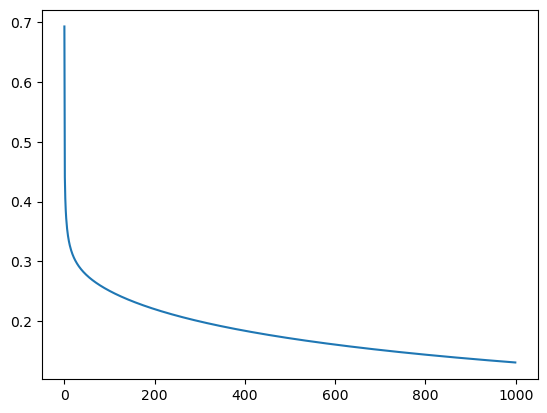

Epoch 1000: loss is 0.13058
Precision: 0.760
Recall: 0.833
F1-score: 0.795


In [4]:
    # Some meta parameters
    epochs_to_draw = 100
    all_loss = []
    plt.ion()

    # Start training
    init = tf.compat.v1.global_variables_initializer()
    with tf.compat.v1.Session() as sess:
        sess.run(init)
        for e in range(num_epoch):
            # tic = time.clock()
            # [TODO 1.16] Compute loss and update weights here
            
            # Update weights...
            w, loss = sess.run([optimizer, cost], feed_dict={x: train_x, y: train_y})
            all_loss.append(loss)
            if (e % epochs_to_draw == epochs_to_draw-1):
                plot_loss(all_loss)
                plt.show()
                plt.pause(0.1)
                print("Epoch %d: loss is %.5f" % (e+1, loss))
            # toc = time.clock()
            # print(toc-tic)
        y_hat = sess.run(pred, feed_dict={x: test_x})
        test(y_hat, test_y)